# EDA Telco

Este Notebook tiene como propósisto realizar un análisis exploratorio de datos (EDA) + los pasos de la metodología CRISP-DM:

1. Comprensión del negocio
2. Comprensión de los datos (EDA)
3. Preparación de los datos
4. Modelado
5. Evaluación

## Comprensión de los datos (EDA)

El objetivo de este análisis exploratorio de datos es comprender el comportamiento y las características de los clientes de la empresa de telecomunicaciones, con especial énfasis en identificar patrones y factores asociados al abandono del servicio (“Churn”).

A través de una exploración descriptiva y visual de las variables disponibles -personales, contractuales, de uso y de facturación— se busca detectar relaciones significativas entre los atributos de los clientes y su propensión a abandonar la compañía.

Este análisis servirá como base para formular hipótesis y orientar futuros modelos predictivos de churn, apoyando la toma de decisiones estratégicas orientadas a retención de clientes, segmentación y diseño de estrategias comerciales personalizadas.

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import matplotlib.patches as mpatches

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    context="notebook",
    style="whitegrid",
    palette="deep",
    font="sans-serif",
    font_scale=1.1,
    rc={
        "figure.figsize": (8, 5),
        "axes.spines.right": False,
        "axes.spines.top": False,
        "axes.facecolor": "#f9f9f9",
        "axes.edgecolor": "#cccccc",
        "axes.linewidth": 1.2,
        "grid.color": "#dddddd",
        "grid.linestyle": "--",
        "grid.linewidth": 0.7,
        "axes.titleweight": "semibold",
        "axes.titlepad": 12,
        "axes.labelpad": 10,
        "legend.frameon": True,
        "legend.framealpha": 0.9,
        "legend.facecolor": "white",
        "legend.edgecolor": "#cccccc",
        "legend.fontsize": 9,         # 🔹 Leyenda más pequeña
        "legend.title_fontsize": 10,  # 🔹 Título de leyenda un poco mayor
        "savefig.dpi": 300,
        "savefig.bbox": "tight"
    }
)

plt.rcParams.update({
    "figure.autolayout": True,
    "figure.facecolor": "white",
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})

print("✅ Estilo visual configurado: leyendas más discretas y elegantes.")


✅ Estilo visual configurado: leyendas más discretas y elegantes.


## Carga e inspección incial 

In [3]:
# Cargar el conjunto de datos y mostrar las primeras filas
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
# Establecer 'customerID' como índice del DataFrame
data.set_index("customerID", inplace=True)
data.index.name

'customerID'

In [5]:
# Mostrar información general del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [6]:
# Convertir la columna 'SeniorCitizen' de valores numéricos a categóricos
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1: "Yes", 0: "No"})
data["SeniorCitizen"].dtype

dtype('O')

In [7]:
# Convertir la columna 'TotalCharges' a tipo numérico, manejando errores
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
data["TotalCharges"].fillna(data["TotalCharges"].median(), inplace=True)
data["TotalCharges"].dtype

C:\Users\juanr\AppData\Local\Temp\ipykernel_11476\2523301703.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["TotalCharges"].fillna(data["TotalCharges"].median(), inplace=True)


dtype('float64')

## Análisis univariado: categórico

In [8]:
# Seleccionar datos de las columnas categóricas

df_cat = data.select_dtypes(include=["object"])
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   SeniorCitizen     7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   object
 8   OnlineBackup      7043 non-null   object
 9   DeviceProtection  7043 non-null   object
 10  TechSupport       7043 non-null   object
 11  StreamingTV       7043 non-null   object
 12  StreamingMovies   7043 non-null   object
 13  Contract          7043 non-null   object
 14  PaperlessBilling  7043 non-null   object
 15  PaymentMethod     7043 non-null   object
 16  Churn             7043 non-null   object
dtypes: o

In [9]:
# Consultar la distribución porcentual de cada categoría en las columnas categóricas

for col in df_cat.columns:
    print((df_cat[col].value_counts() / len(df_cat) * 100).round(2))
    print("--------------------------------------------------")

gender
Male      50.48
Female    49.52
Name: count, dtype: float64
--------------------------------------------------
SeniorCitizen
No     83.79
Yes    16.21
Name: count, dtype: float64
--------------------------------------------------
Partner
No     51.7
Yes    48.3
Name: count, dtype: float64
--------------------------------------------------
Dependents
No     70.04
Yes    29.96
Name: count, dtype: float64
--------------------------------------------------
PhoneService
Yes    90.32
No      9.68
Name: count, dtype: float64
--------------------------------------------------
MultipleLines
No                  48.13
Yes                 42.18
No phone service     9.68
Name: count, dtype: float64
--------------------------------------------------
InternetService
Fiber optic    43.96
DSL            34.37
No             21.67
Name: count, dtype: float64
--------------------------------------------------
OnlineSecurity
No                     49.67
Yes                    28.67
No internet serv

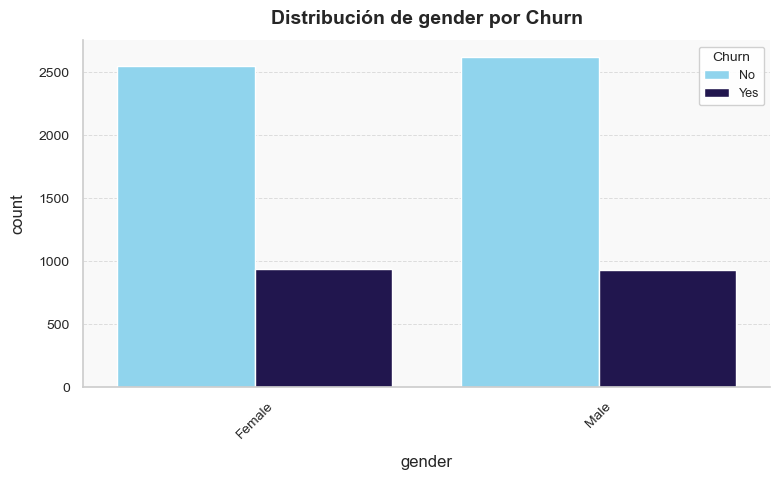

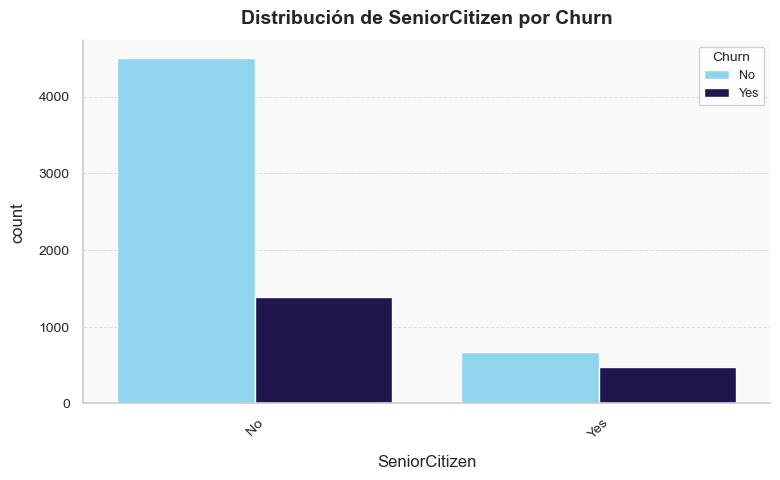

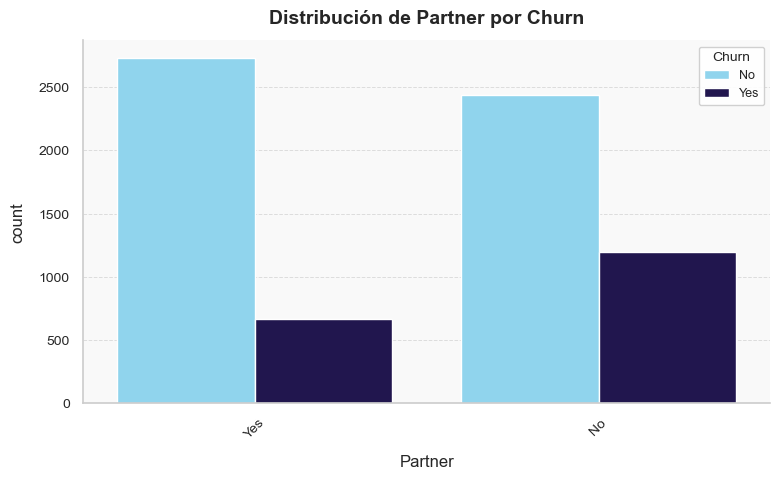

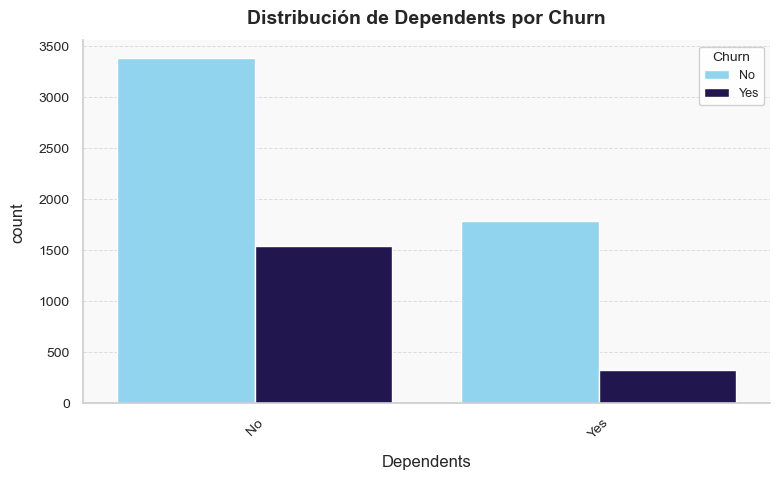

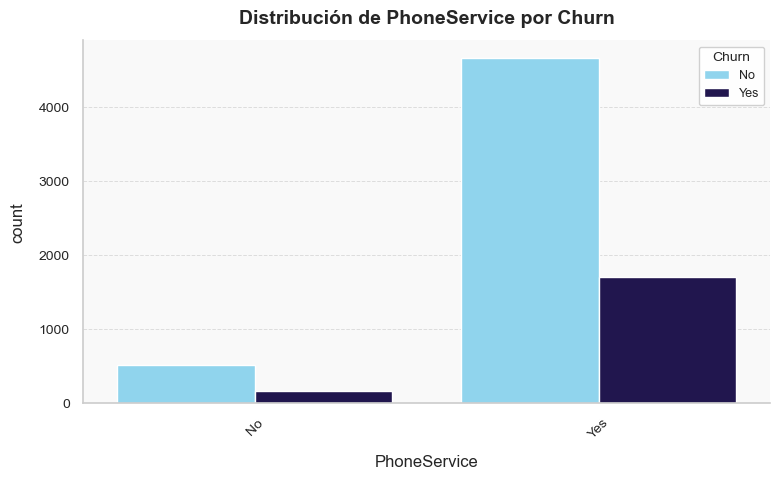

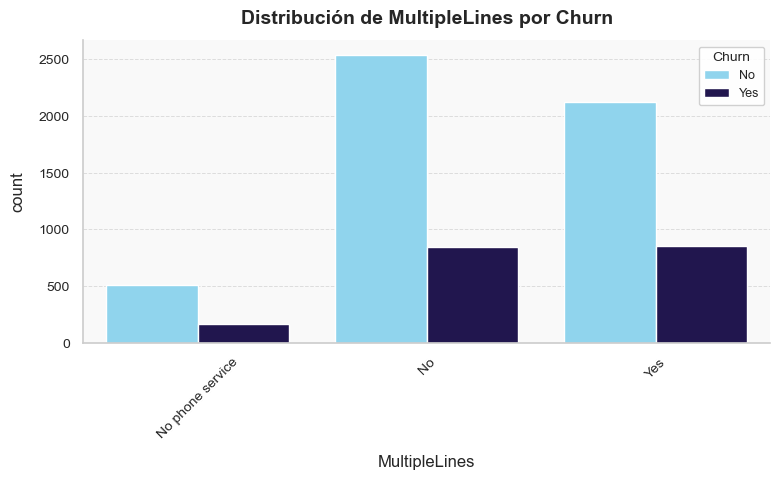

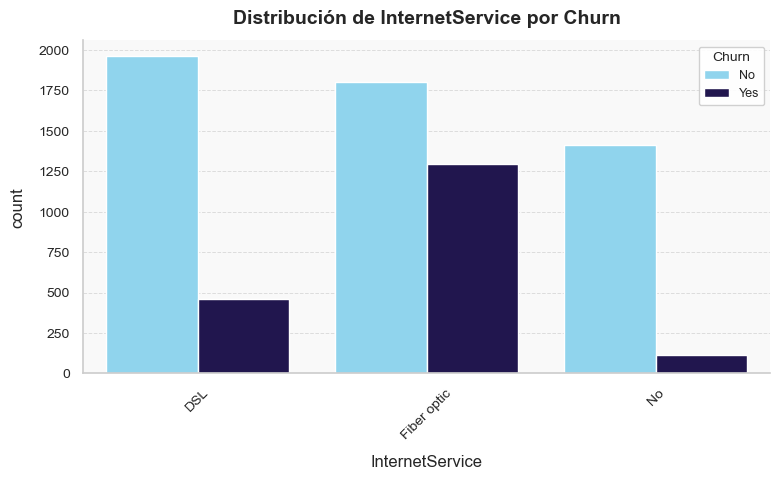

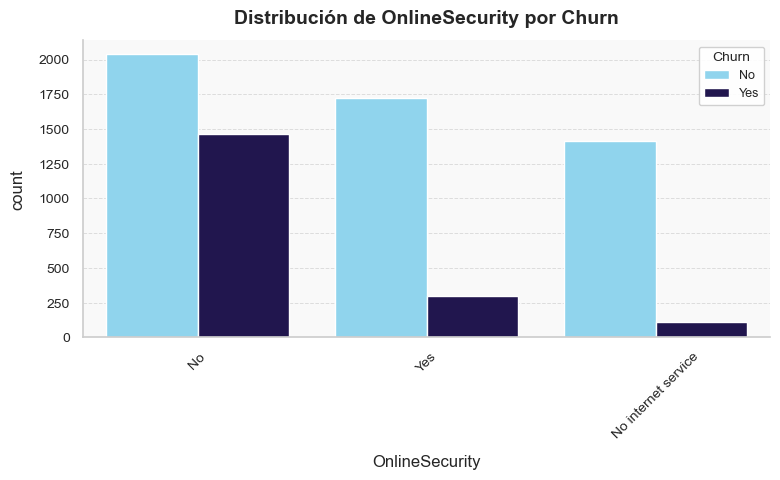

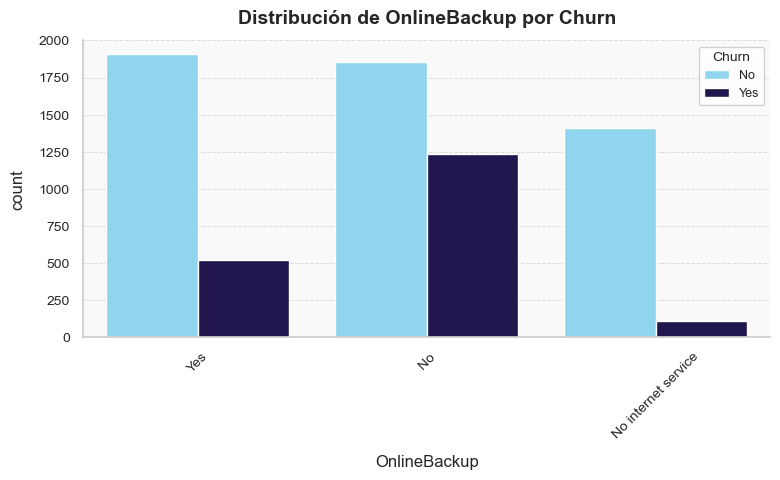

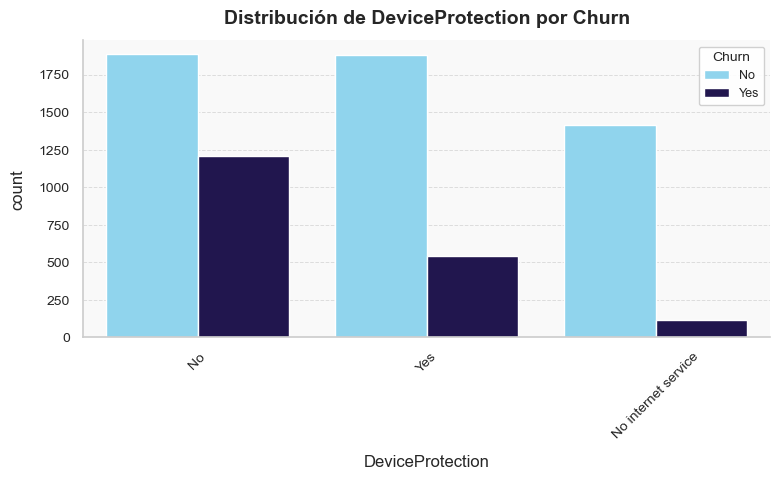

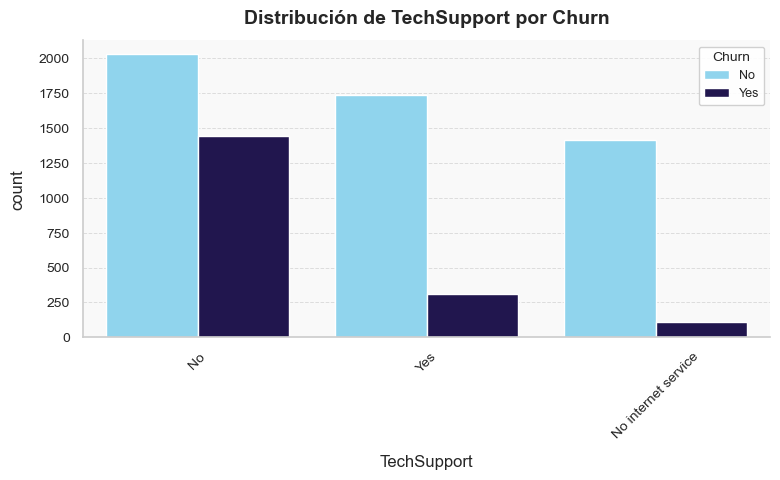

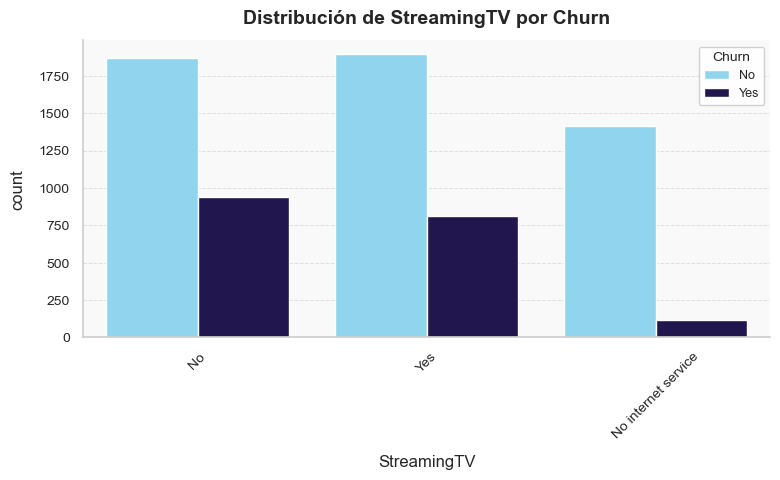

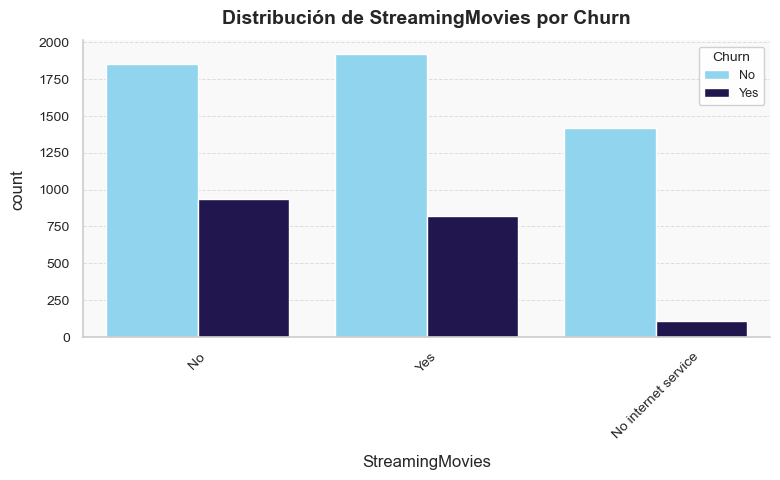

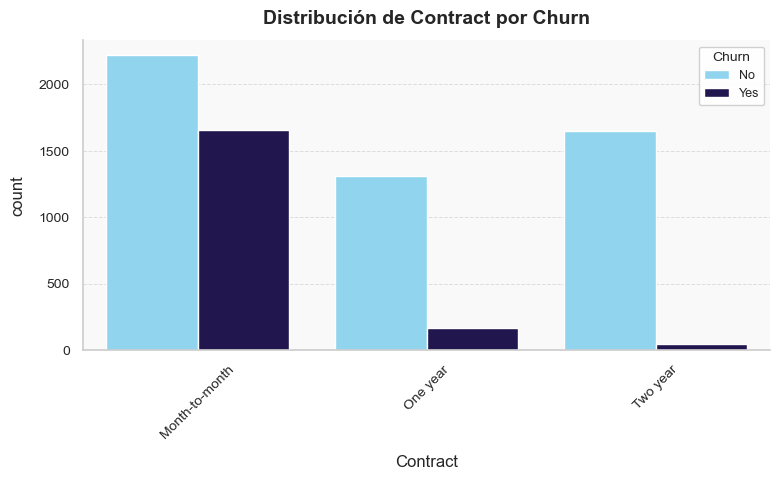

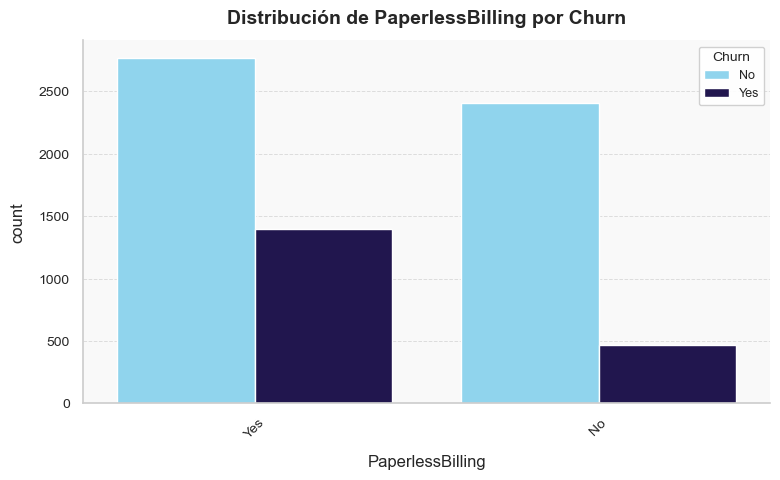

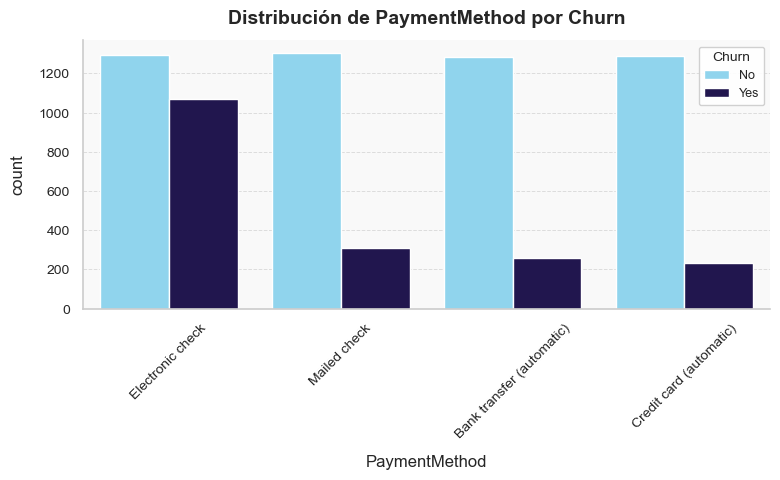

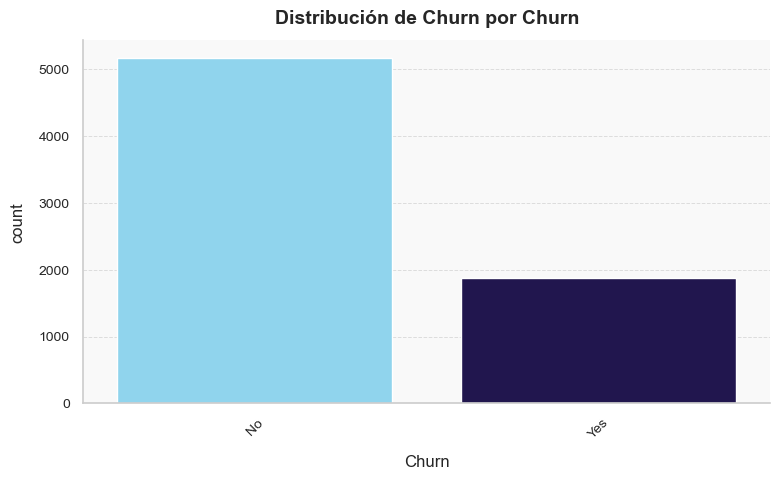

In [10]:
# Visualizar la distribución de las columnas categóricas con respecto a la columna 'Churn'

custom_palette = {
    "No": "#81DBFC",   # Azul claro
    "Yes": "#1C0D57"   # Azul rey / azul noche
}

for col in df_cat.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(
        data=df_cat,
        x=col,
        hue="Churn",
        palette=custom_palette
    )
    plt.title(f"Distribución de {col} por Churn", fontsize=14, weight="bold")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

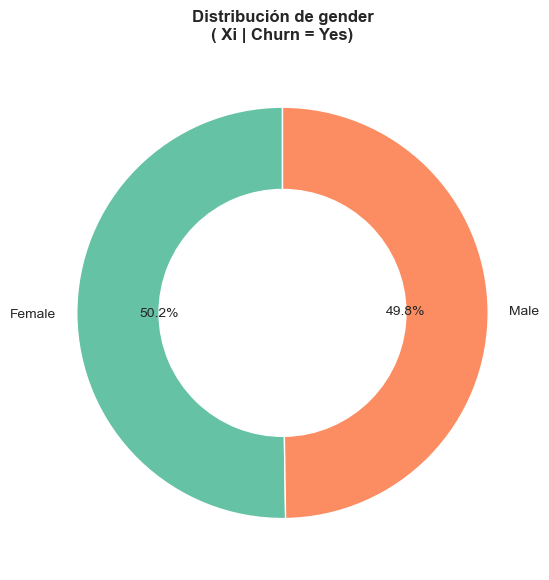

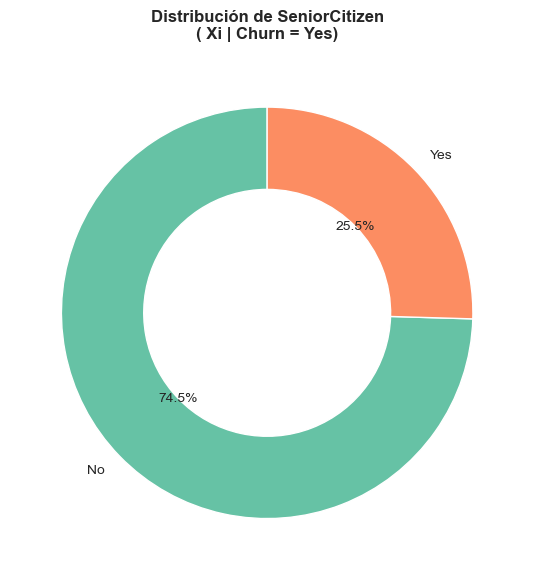

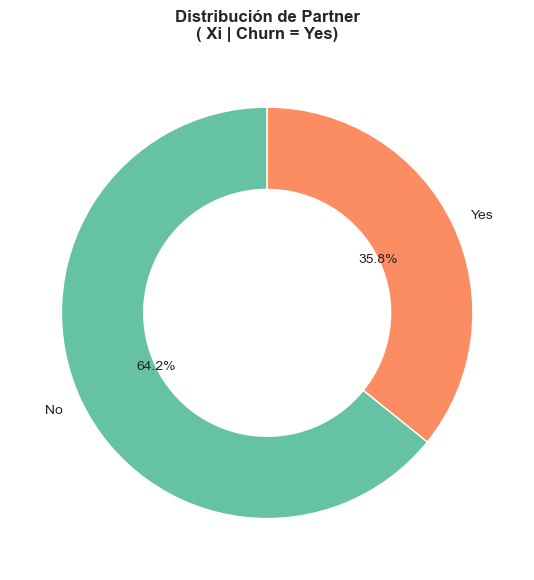

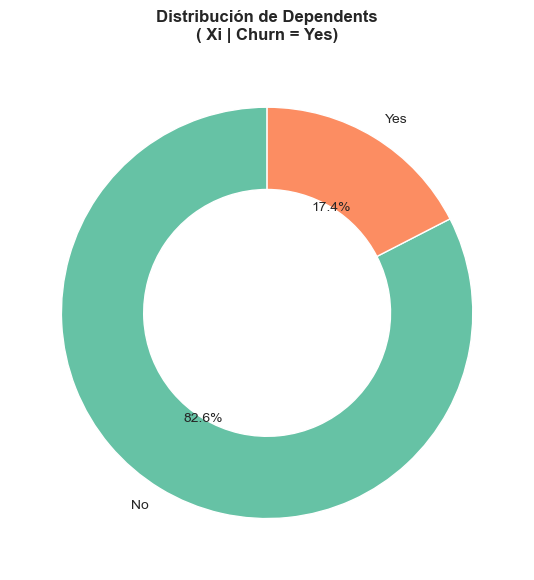

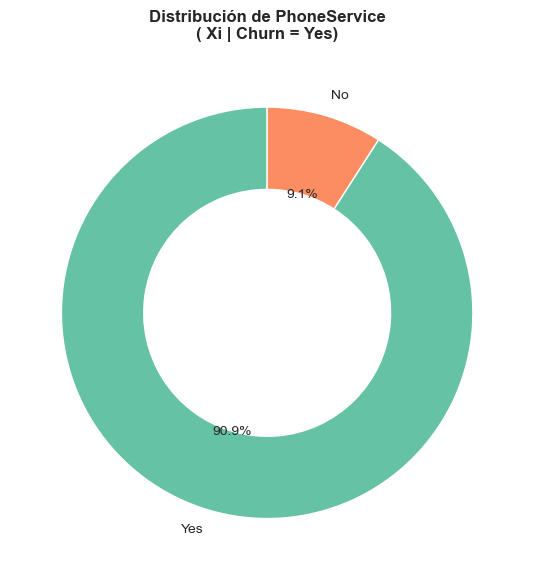

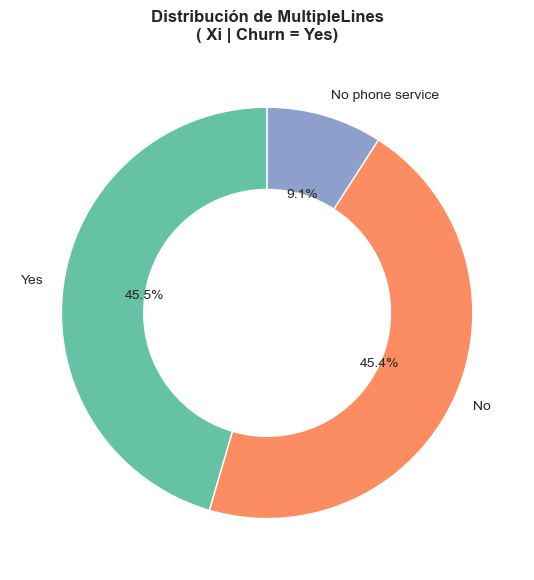

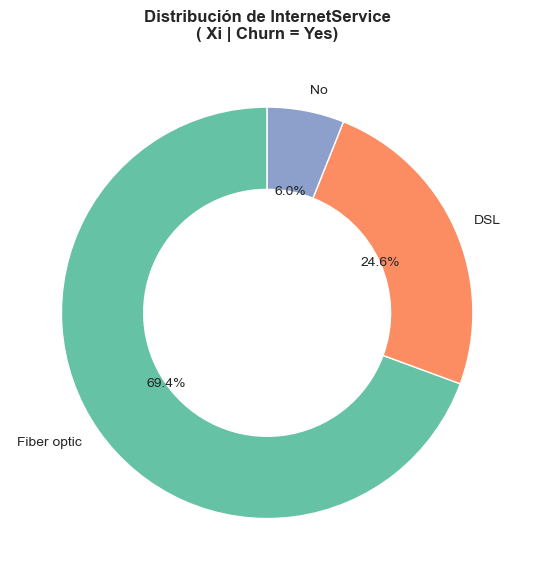

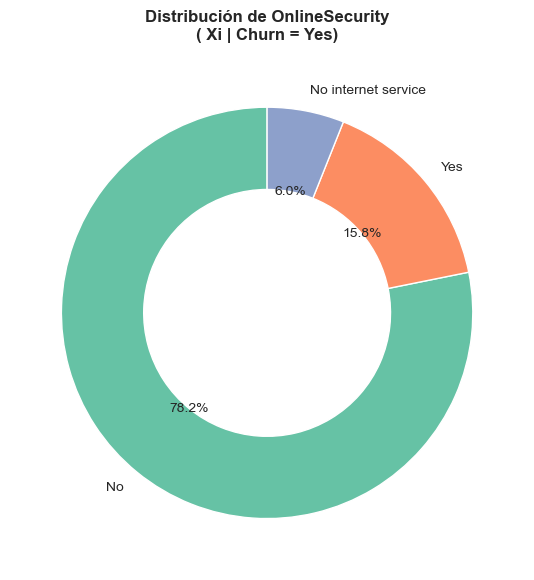

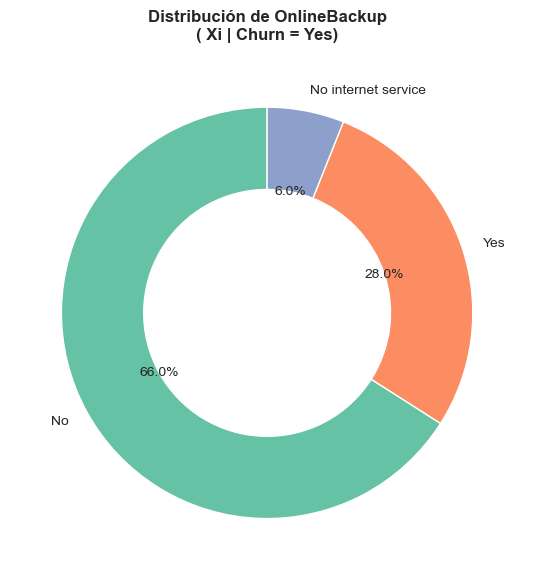

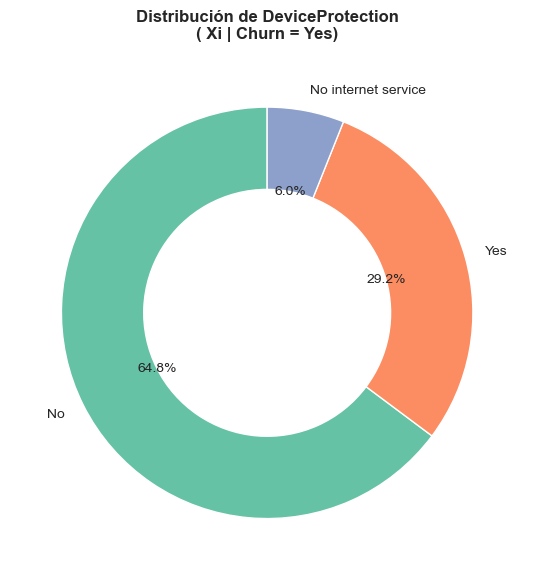

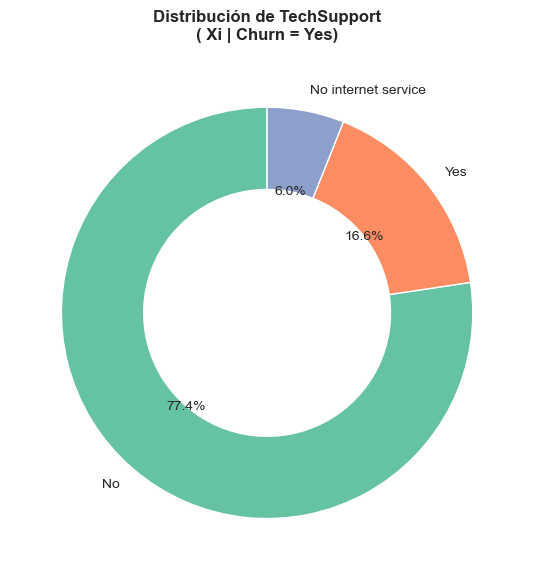

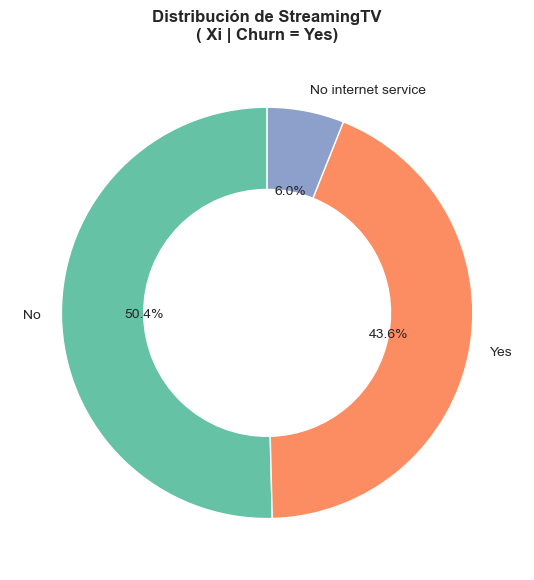

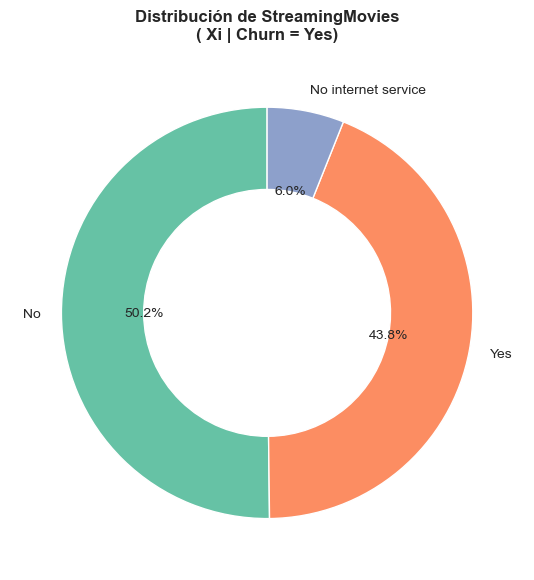

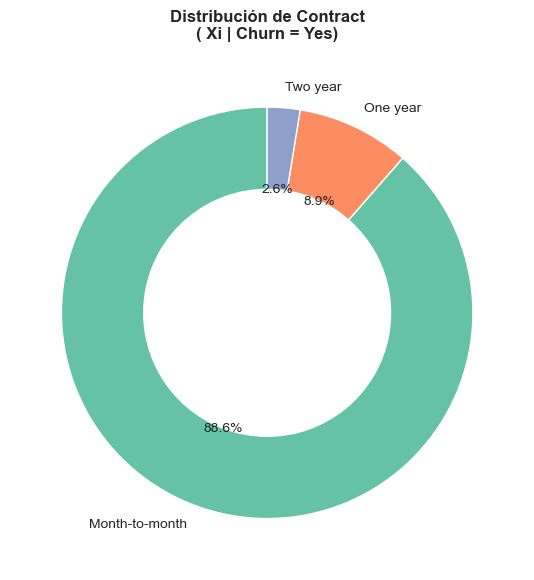

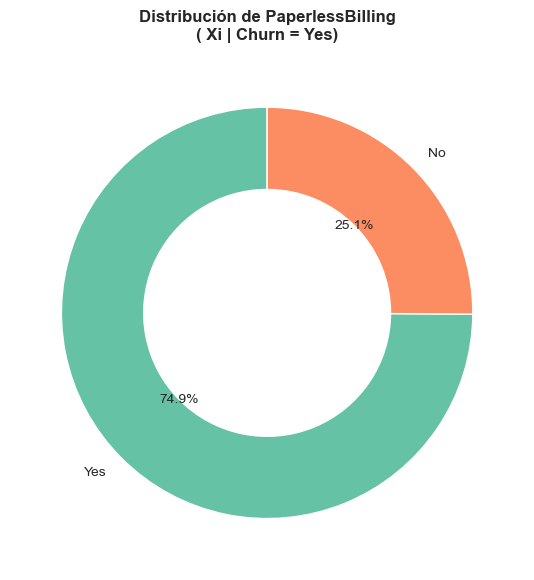

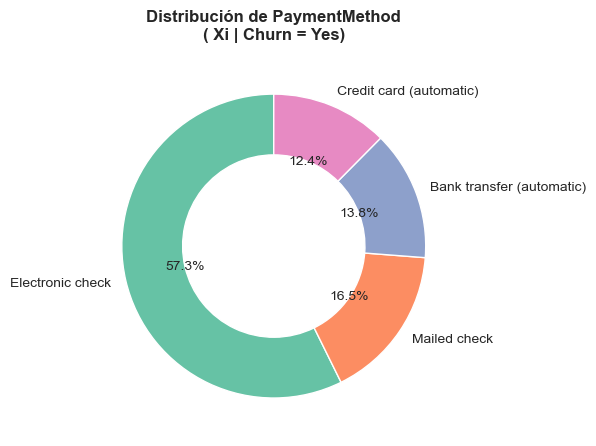

In [11]:
# Filtrar el DataFrame de categóricas para incluir solo filas donde 'Churn' es 'Yes' 

df_cat_churn_yes = df_cat[df_cat["Churn"] == "Yes"]

# Visualizar la distribución porcentual de cada categoría en las columnas categóricas
# para 'Churn' = 'Yes'

for col in df_cat.columns:
    if col != "Churn":
        dist = df_cat_churn_yes[col].value_counts(normalize=True) * 100
        plt.figure(figsize=(6, 6))
        plt.pie(dist, labels=dist.index, autopct="%1.1f%%",
            startangle=90,wedgeprops={"width": 0.4, "edgecolor": "white"},
            textprops={"fontsize": 10}, colors=sns.color_palette("Set2")
        )
        plt.title(f"Distribución de {col}\n( Xi | Churn = Yes)", fontsize=12, weight="bold")
        plt.tight_layout()
        plt.show()

C:\Users\juanr\AppData\Local\Temp\ipykernel_11476\460610043.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


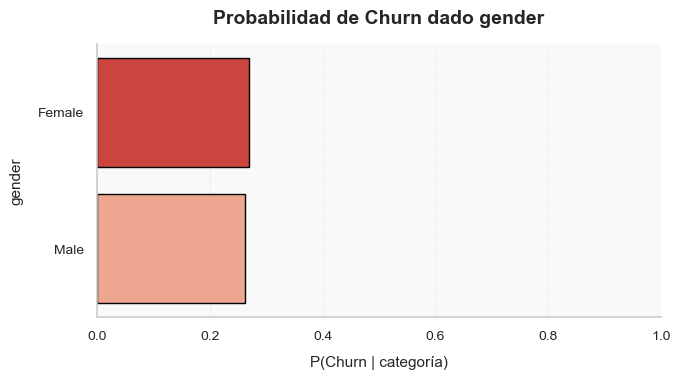

C:\Users\juanr\AppData\Local\Temp\ipykernel_11476\460610043.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


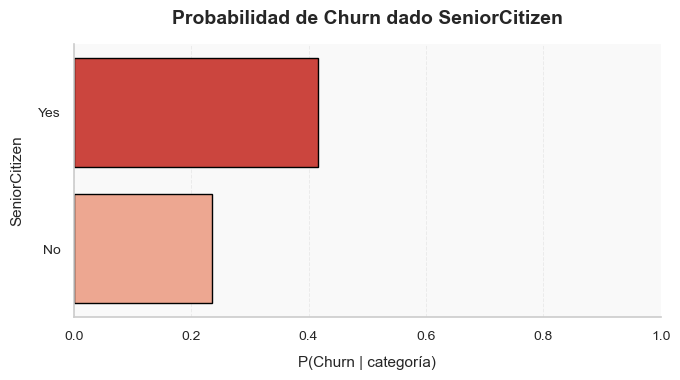

C:\Users\juanr\AppData\Local\Temp\ipykernel_11476\460610043.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


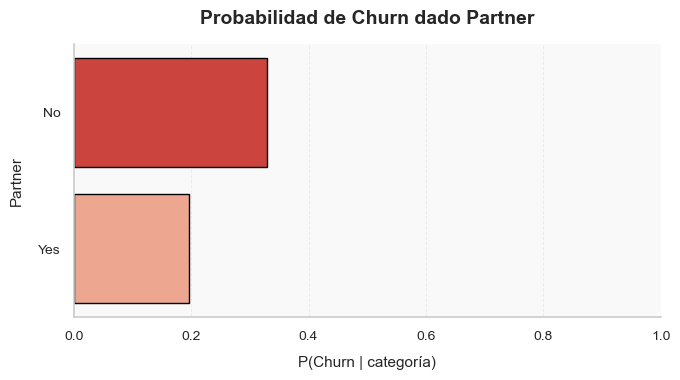

C:\Users\juanr\AppData\Local\Temp\ipykernel_11476\460610043.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


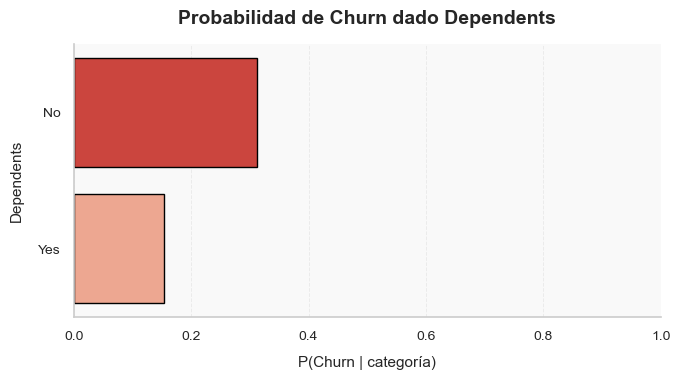

C:\Users\juanr\AppData\Local\Temp\ipykernel_11476\460610043.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


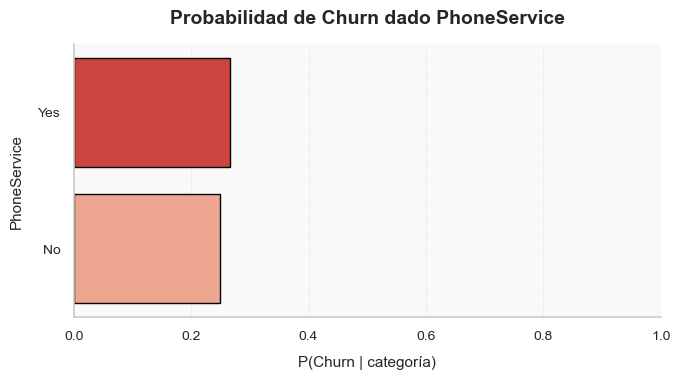

C:\Users\juanr\AppData\Local\Temp\ipykernel_11476\460610043.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


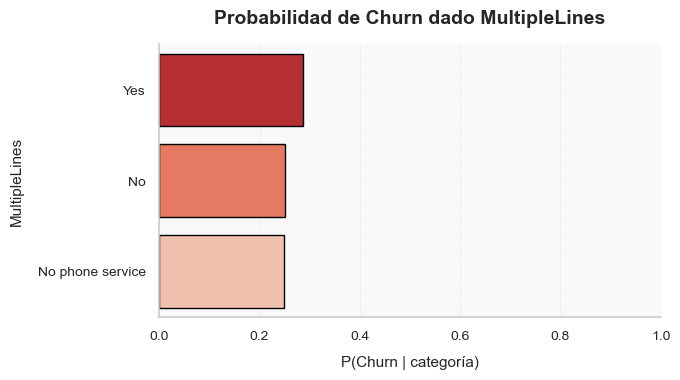

C:\Users\juanr\AppData\Local\Temp\ipykernel_11476\460610043.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


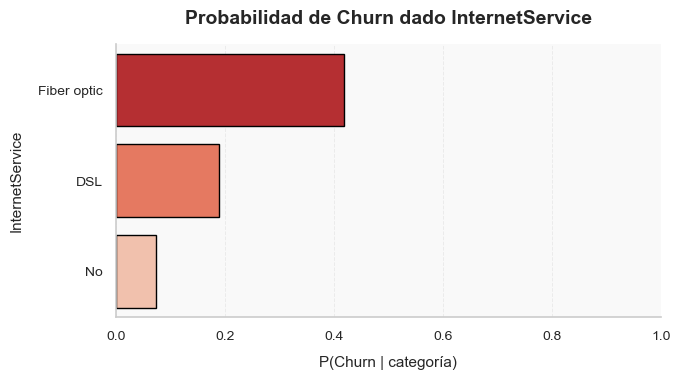

C:\Users\juanr\AppData\Local\Temp\ipykernel_11476\460610043.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


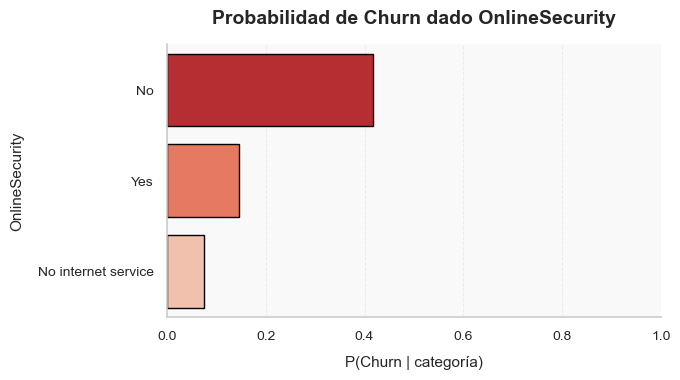

C:\Users\juanr\AppData\Local\Temp\ipykernel_11476\460610043.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


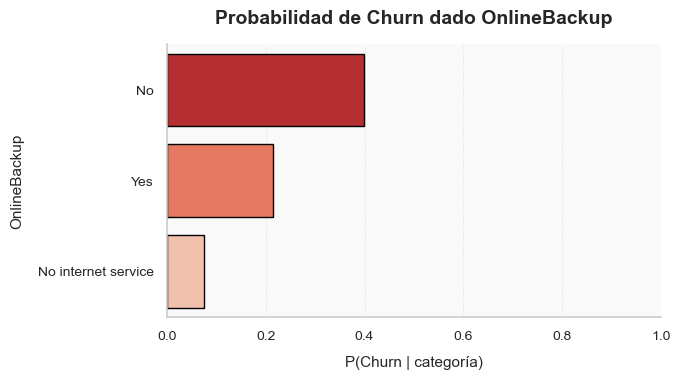

C:\Users\juanr\AppData\Local\Temp\ipykernel_11476\460610043.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


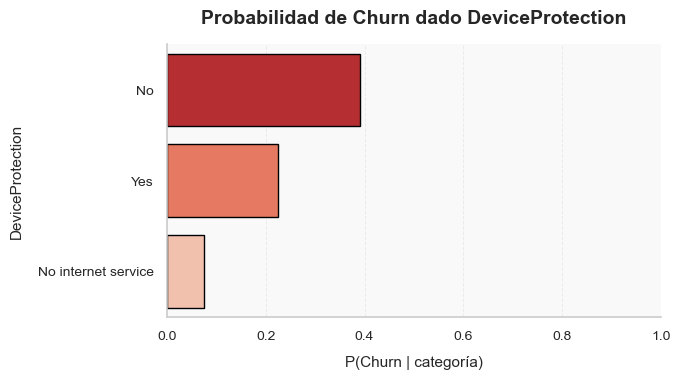

C:\Users\juanr\AppData\Local\Temp\ipykernel_11476\460610043.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


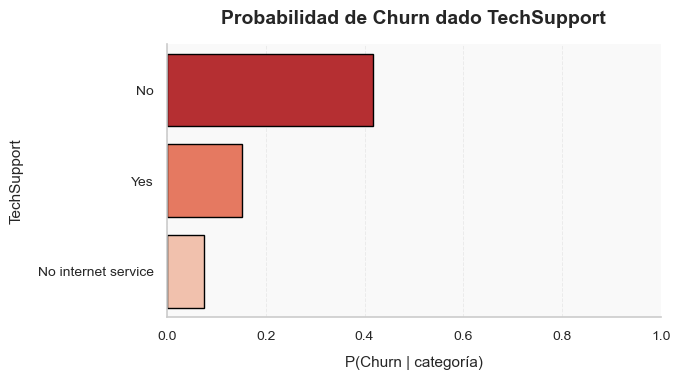

C:\Users\juanr\AppData\Local\Temp\ipykernel_11476\460610043.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


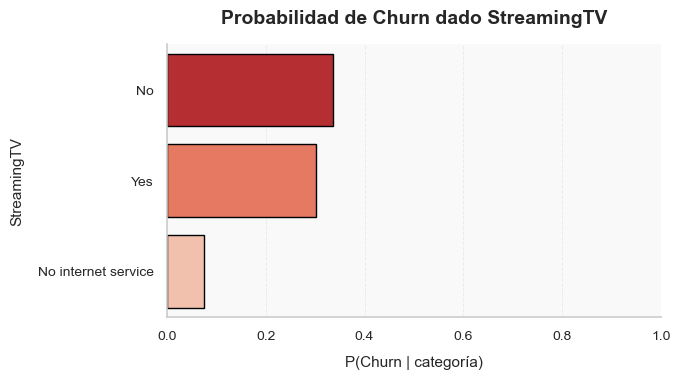

C:\Users\juanr\AppData\Local\Temp\ipykernel_11476\460610043.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


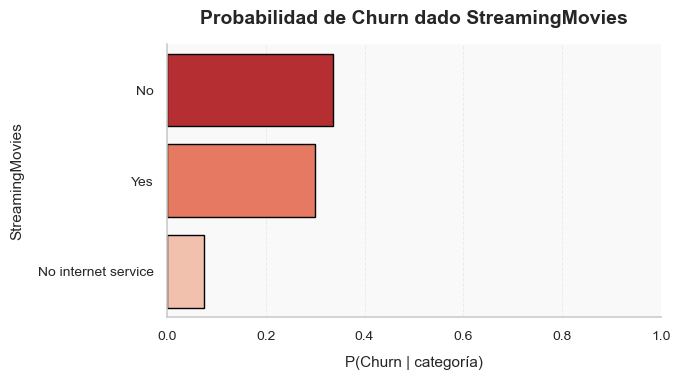

C:\Users\juanr\AppData\Local\Temp\ipykernel_11476\460610043.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


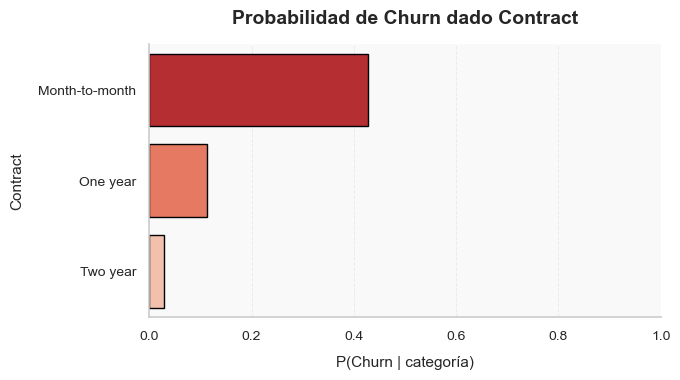

C:\Users\juanr\AppData\Local\Temp\ipykernel_11476\460610043.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


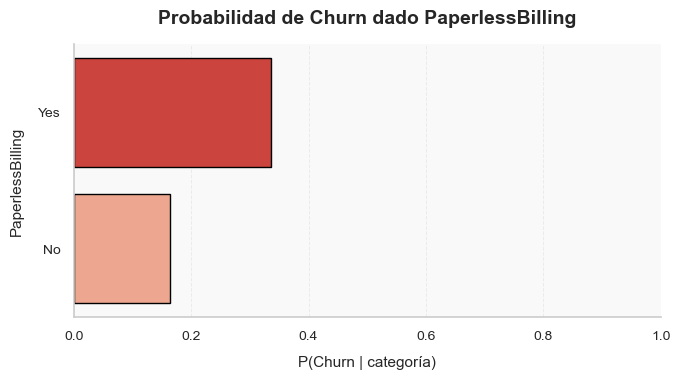

C:\Users\juanr\AppData\Local\Temp\ipykernel_11476\460610043.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


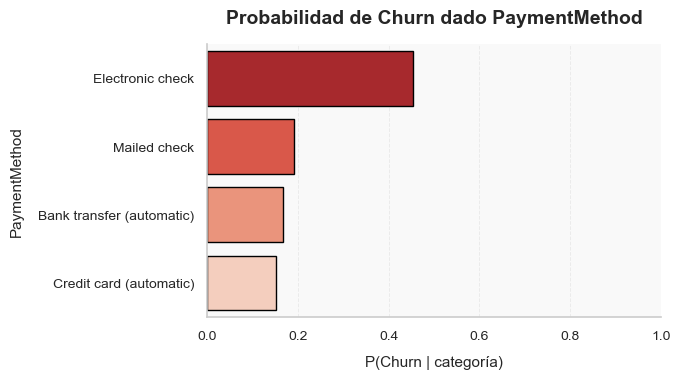

C:\Users\juanr\AppData\Local\Temp\ipykernel_11476\460610043.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


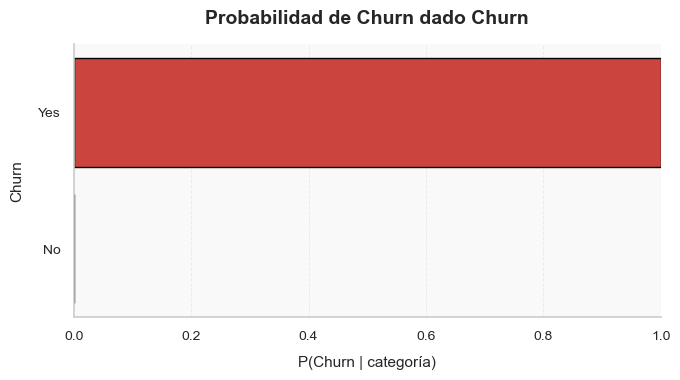

In [12]:
def plot_p_churn_given_category(data, var, churn_col="Churn"):
    """
    Calcula y visualiza la probabilidad de Churn dado que X= i.
    
    Parameters
    ----------
    data : pd.DataFrame
        Dataset original.
    var : str
        Variable categórica para condicionar.
    churn_col : str, optional
        Nombre de la variable objetivo ('Churn').
    """
    
    if data[var].dtype not in ["object", "category"]:
        raise ValueError(f"La variable '{var}' no es categórica.")

    cond_prob = (
        data.groupby(var)[churn_col]
        .apply(lambda x: (x == "Yes").mean())
        .reset_index(name="P(Churn | X=i)")
        .sort_values(by="P(Churn | X=i)", ascending=False)
    )

    plt.figure(figsize=(7, 4))
    sns.barplot(
        data=cond_prob,
        x="P(Churn | X=i)",
        y=var,
        palette="Reds_r",
        edgecolor="black"
    )

    plt.title(f"Probabilidad de Churn dado {var}", fontsize=14, weight="bold", pad=15)
    plt.xlabel("P(Churn | categoría)", fontsize=11)
    plt.ylabel(var, fontsize=11)
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

    return cond_prob

for i in df_cat.columns:
    plot_p_churn_given_category(data, i)

## Análisis bivariado: categórico

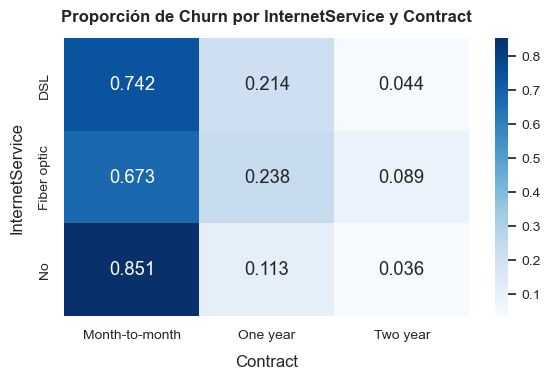

In [13]:
# Pivot table: proporción de Churn por combinación de InternetService y Contract
pivot_prop = (pd.crosstab(index=data["InternetService"],
              columns=data["Contract"], values=(data["Churn"] == "Yes").astype(int),
        aggfunc="mean").round(3))

# Normalizar por fila (cada fila suma 1)
pivot_prop = pivot_prop.div(pivot_prop.sum(axis=1), axis=0).round(3)

plt.figure(figsize=(6,4))
sns.heatmap(pivot_prop, annot=True, fmt=".3f", cmap="Blues")
plt.title("Proporción de Churn por InternetService y Contract", fontsize=12, weight="bold")
plt.xlabel("Contract")
plt.ylabel("InternetService")
plt.tight_layout()
plt.show()

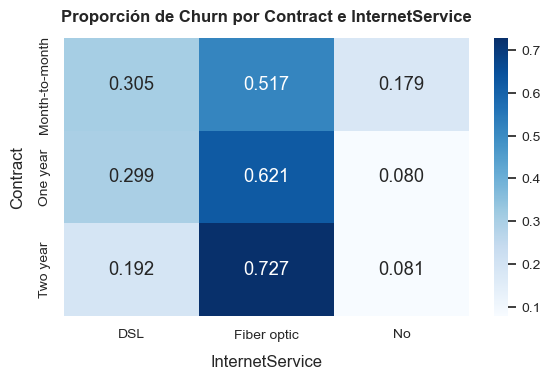

In [14]:
# Pivot table: proporción de Churn por combinación de Contract e InternetService
pivot_prop = (pd.crosstab(index=data["Contract"],
              columns=data["InternetService"], values=(data["Churn"] == "Yes").astype(int),
        aggfunc="mean").round(3))

# Normalizar por fila (cada fila suma 1)
pivot_prop = pivot_prop.div(pivot_prop.sum(axis=1), axis=0).round(3)

plt.figure(figsize=(6,4))
sns.heatmap(pivot_prop, annot=True, fmt=".3f", cmap="Blues")
plt.title("Proporción de Churn por Contract e InternetService", fontsize=12, weight="bold")
plt.xlabel("InternetService")
plt.ylabel("Contract")
plt.tight_layout()
plt.show()

## Análisis univariado: númericas

In [15]:
# Seleccionar datos de las columnas numéricas

df_num = data.select_dtypes(include=["float64", "int64"])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7043 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 478.1+ KB


Estadísticas descriptivas para la columna: tenure
count    7043.00
mean       32.37
std        24.56
min         0.00
25%         9.00
50%        29.00
75%        55.00
max        72.00
Name: tenure, dtype: float64


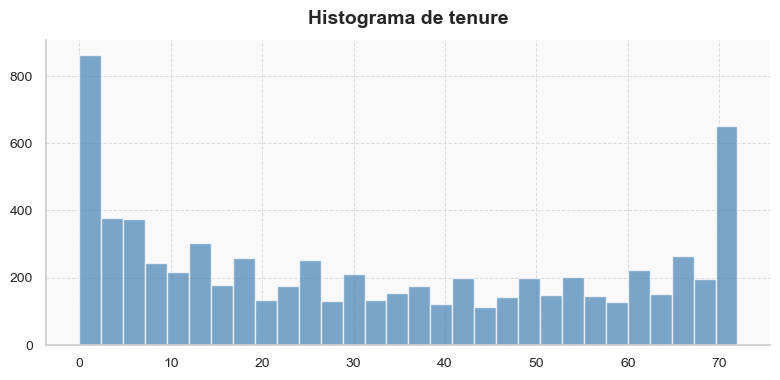

Estadísticas descriptivas para la columna: MonthlyCharges
count    7043.00
mean       64.76
std        30.09
min        18.25
25%        35.50
50%        70.35
75%        89.85
max       118.75
Name: MonthlyCharges, dtype: float64


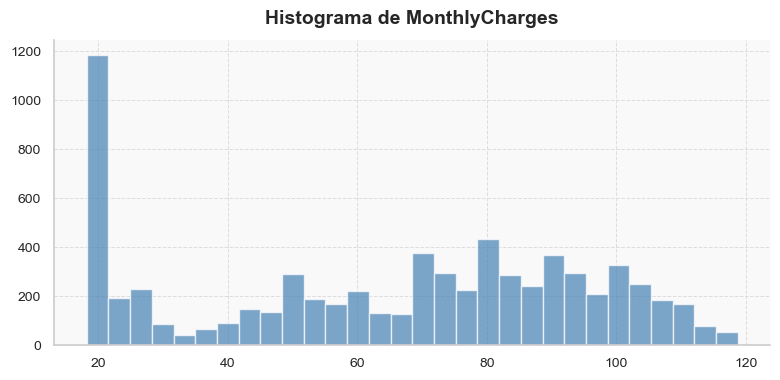

Estadísticas descriptivas para la columna: TotalCharges
count    7043.00
mean     2281.92
std      2265.27
min        18.80
25%       402.22
50%      1397.48
75%      3786.60
max      8684.80
Name: TotalCharges, dtype: float64


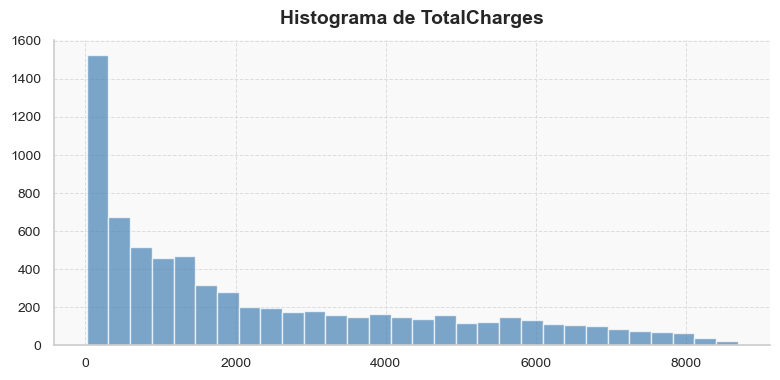

In [16]:
# Consultar estadísticas descriptivas de las columnas numéricas y graficar histogramas

for col in df_num.columns:
    print(f"Estadísticas descriptivas para la columna: {col}")
    print(df_num[col].describe().round(2))
    df_num[col].hist(bins=30, figsize=(8, 4), alpha = 0.7, color='steelblue')
    plt.title(f"Histograma de {col}")
    plt.show()


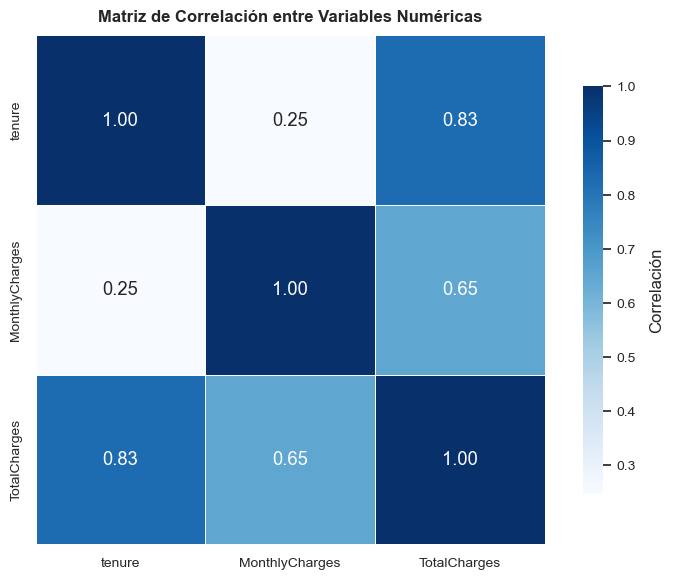

In [17]:
# Matriz de correlación con escala de azules

correlation_matrix = df_num.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues", square=True,
    linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Correlación"})
plt.title("Matriz de Correlación entre Variables Numéricas", fontsize=12, weight="bold", pad=10)
plt.tight_layout()
plt.show()


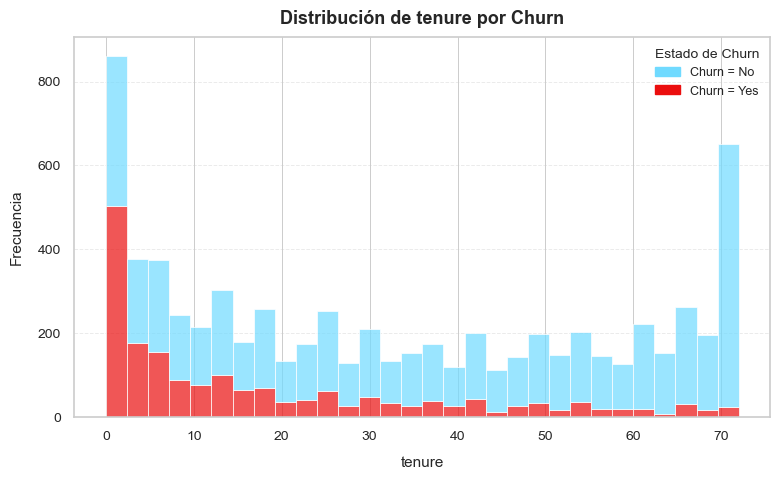

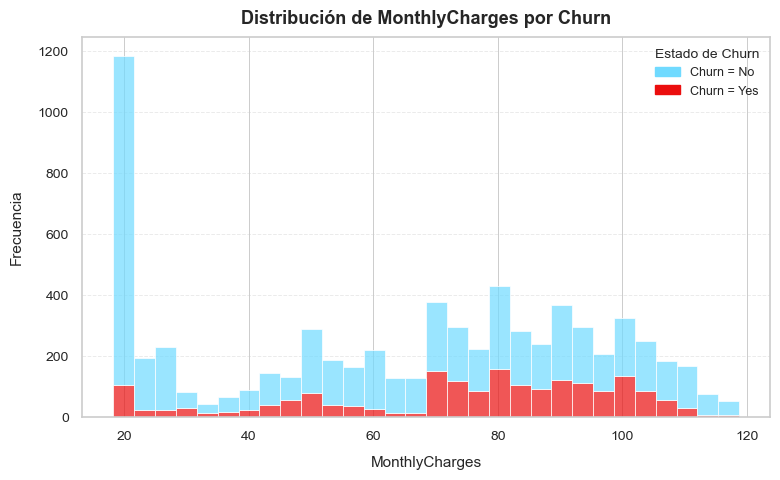

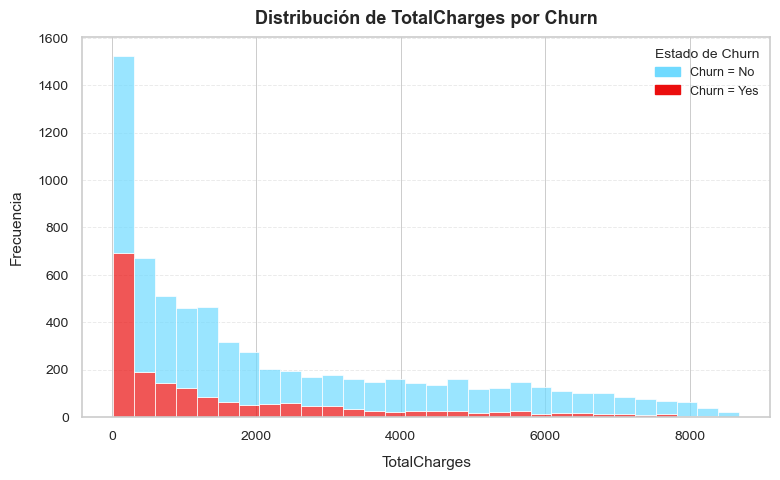

In [18]:
# Función para graficar la distribución de variables numéricas según 'Churn'

def plot_num_by_churn(df_num, churn_series):

    colors = {"No": "#70DAFF", "Yes": "#EB0E0E"}  
    sns.set_style("whitegrid")

    for col in df_num.columns:
        plt.figure(figsize=(8, 5))
        ax = sns.histplot(x=df_num[col], hue=churn_series, kde=False,         
            bins=30, multiple="stack", palette=colors, alpha=0.7, edgecolor="white",
            linewidth=0.5)
        plt.title(f"Distribución de {col} por Churn", fontsize=13, weight="bold", pad=10)
        plt.xlabel(col, fontsize=11)
        plt.ylabel("Frecuencia", fontsize=11)
        yes_patch = mpatches.Patch(color=colors["Yes"], label="Churn = Yes")
        no_patch = mpatches.Patch(color=colors["No"], label="Churn = No")
        plt.legend(handles=[no_patch, yes_patch], title="Estado de Churn", fontsize=9,
            title_fontsize=10, loc="upper right",frameon=False)
        plt.grid(axis="y", linestyle="--", alpha=0.4)
        plt.tight_layout()
        plt.show()

plot_num_by_churn(df_num, data["Churn"])

## Análisis multivariado: númericas

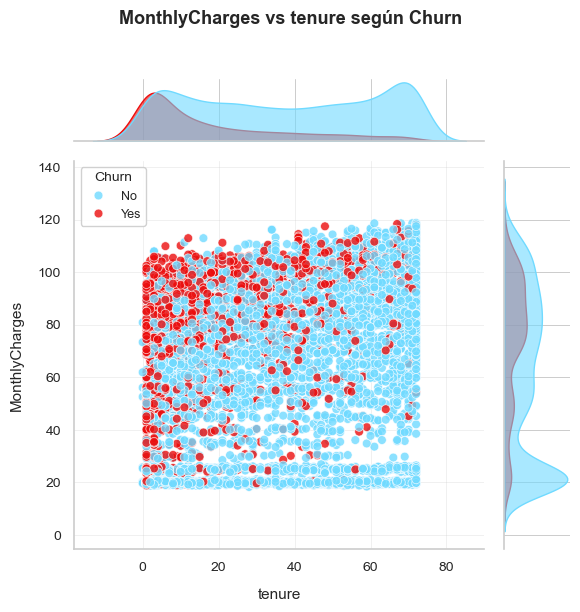

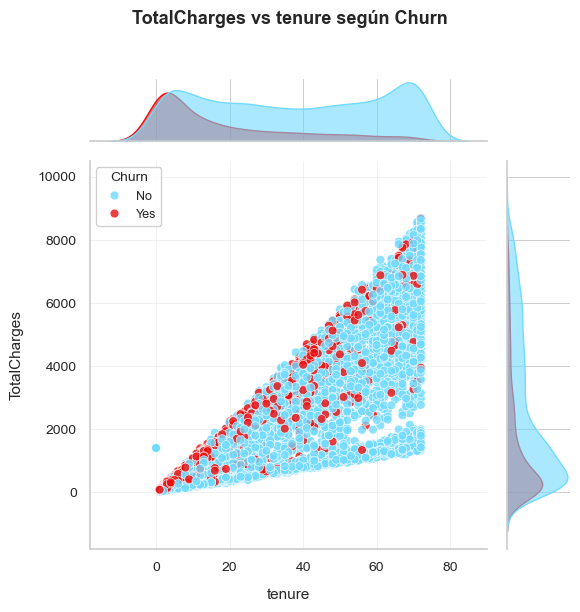

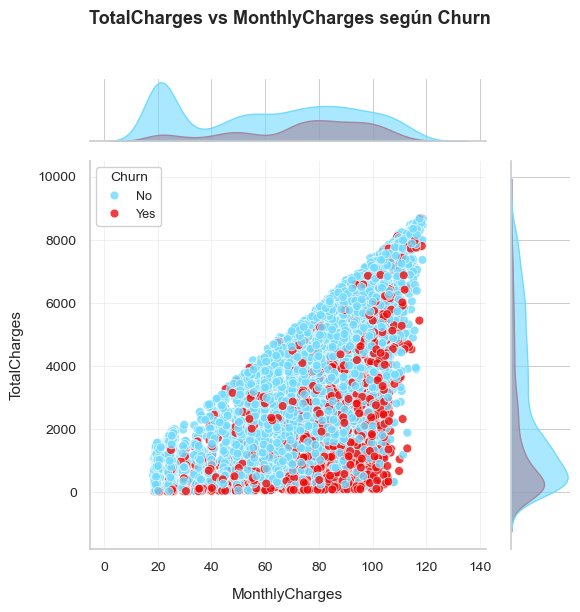

In [19]:
# Función para graficar diagramas de dispersión con histogramas marginales

def plot_scatter_with_hist(df_num, churn_series):

    sns.set_style("whitegrid")
    palette = {"No": "#70DAFF", "Yes": "#EB0E0E"}  
    combs = list(itertools.combinations(df_num.columns, 2))

    for x, y in combs:
        g = sns.jointplot(data=df_num.assign(Churn=churn_series), x=x, y=y,
            hue="Churn", kind="scatter", palette=palette,
            alpha=0.8, s=40,marginal_kws=dict(fill=True, alpha=0.6))
        g.fig.suptitle(f"{y} vs {x} según Churn", fontsize=13, weight="bold", y=1.02)
        g.ax_joint.set_xlabel(x, fontsize=11)
        g.ax_joint.set_ylabel(y, fontsize=11)
        g.ax_joint.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

plot_scatter_with_hist(df_num, data["Churn"])

In [20]:
# Función para graficar muestras (n=126) estratificadas 3D con Plotly

def plot_3d_stratified_samples_seq(df_num, churn_series, n=100, samples=4):

    np.random.seed(30102025)
    df = df_num.copy()
    df["Churn"] = churn_series.values

    # Variables numéricas
    x_col, y_col, z_col = df_num.columns

    # Separar por clase
    df_yes = df[df["Churn"] == "Yes"].reset_index(drop=True)
    df_no = df[df["Churn"] == "No"].reset_index(drop=True)

    # Cálculo proporcional de tamaño estratificado
    prop_yes = len(df_yes) / len(df)
    n_yes = int(n * prop_yes)
    n_no = n - n_yes

    # Mezclar índices y dividir en subconjuntos sin reemplazo
    yes_idx = np.random.permutation(len(df_yes))
    no_idx = np.random.permutation(len(df_no))

    yes_chunks = np.array_split(yes_idx[:samples * n_yes], samples)
    no_chunks = np.array_split(no_idx[:samples * n_no], samples)

    # Colores coherentes
    color_map = {"No": "#70DAFF", "Yes": "#EB0E0E"}

    # Generar los 4 gráficos
    for i in range(samples):
        df_sample = pd.concat([
            df_no.iloc[no_chunks[i]],
            df_yes.iloc[yes_chunks[i]]])

        fig = px.scatter_3d(df_sample, x=x_col, y=y_col, z=z_col, color="Churn", color_discrete_map=color_map, 
        title=f"Muestra {i+1} - Visualización 3D Estratificada (n={len(df_sample)})", opacity=0.8,
        size_max=6, symbol="Churn")
        fig.update_traces(marker=dict(size=5, line=dict(width=0.5, color='DarkSlateGrey')))
        fig.update_layout(legend_title_text="Churn",
            scene=dict(xaxis_title=x_col, yaxis_title=y_col, zaxis_title=z_col, bgcolor="white"),
            margin=dict(l=0, r=0, b=0, t=40))
        fig.write_html(f"3D_Sample_{i+1}.html")
        fig.show()

plot_3d_stratified_samples_seq(df_num, data["Churn"])

### Análisis numérico y categórico

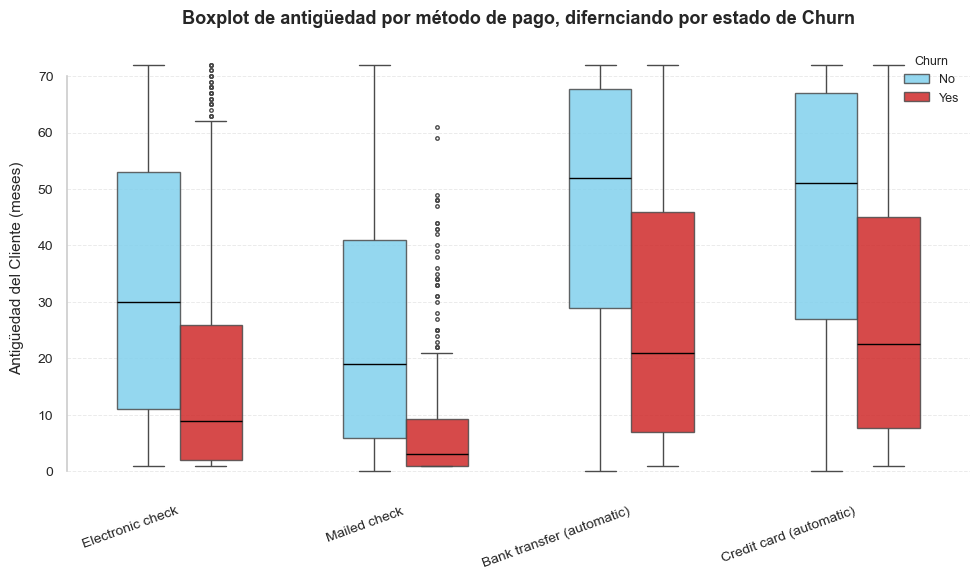

In [21]:
# Boxplot de 'tenure' por 'PaymentMethod' y diferenciado por 'Churn'

plt.figure(figsize=(10, 6))
sns.set_palette(["#70DAFF","#EB0E0E" ])  

ax = sns.boxplot(data=data, x="PaymentMethod", y="tenure", hue="Churn", fliersize=2.5,
    linewidth=1, width=0.55, boxprops=dict(alpha=0.85), 
    medianprops=dict(color="black", linewidth=1),
    whiskerprops=dict(linewidth=1),
    capprops=dict(linewidth=1))

plt.title("Boxplot de antigüedad por método de pago, difernciando por estado de Churn",
fontsize=13, weight="bold", pad=15)
plt.xlabel("")  
plt.ylabel("Antigüedad del Cliente (meses)", fontsize=11)
sns.despine(trim=True)  
plt.xticks(rotation=20, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.legend(title="Churn", title_fontsize=9, fontsize=9, loc="upper right", frameon=False)
sns.despine(trim=True, bottom=True)
plt.tight_layout()
plt.show()


In [22]:
# Crear nueva columna 'MeanMensual' como el cociente de 'TotalCharges' y 'tenure'
data["MeanMensual"] = data["TotalCharges"] / data["tenure"]

In [23]:
# Verificar si 'MeanMensual' es igual a 'MonthlyCharges'
v = data["MeanMensual"] ==  data["MonthlyCharges"]
v.sum()

614

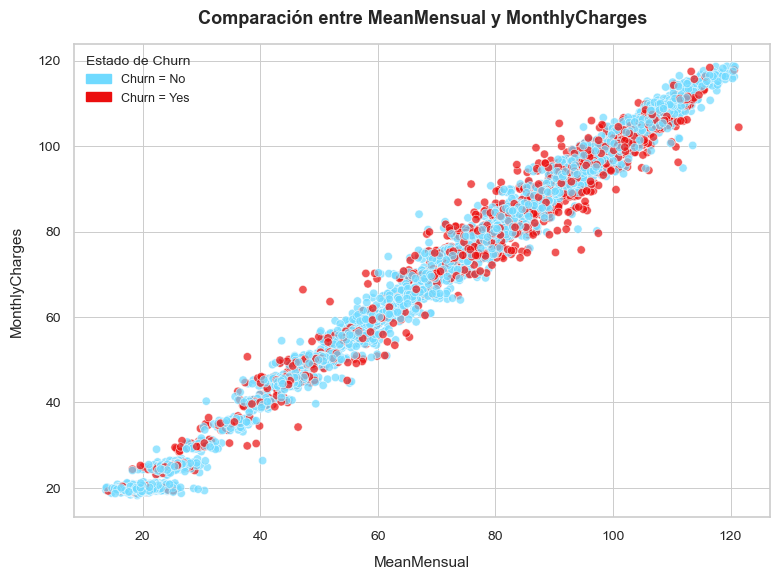

In [24]:
# Gráfico de dispersión entre 'MeanMensual' y 'MonthlyCharges', diferenciado por 'Churn'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="MeanMensual", y="MonthlyCharges", hue="Churn", palette={"No": "#70DAFF", "Yes": "#EB0E0E"}, alpha=0.7)
plt.title("Comparación entre MeanMensual y MonthlyCharges", fontsize=13, weight="bold", pad=15)
plt.xlabel("MeanMensual", fontsize=11)          
plt.ylabel("MonthlyCharges", fontsize=11)
yes_patch = mpatches.Patch(color="#EB0E0E", label="Churn = Yes")
no_patch = mpatches.Patch(color="#70DAFF", label="Churn = No")
plt.legend(handles=[no_patch, yes_patch], title="Estado de Churn", fontsize=9,
    title_fontsize=10, loc="upper left", frameon=False)         
plt.tight_layout()
plt.show()

### Probabilidad condicional: Bayes

## 3. Preparación de los datos

In [25]:
# Crear nuevo DataFrame base
df_model = data.copy()
df_model = df_model.drop(columns=["MeanMensual"])

### Variables binarias

In [26]:
# Codificación de variables binarias

binarias = ["SeniorCitizen", "Partner", "Dependents",
            "PhoneService", "PaperlessBilling", "Churn"]

def binarize(col):
    return col.map({"Yes": 1, "No": 0})

df_model[binarias] = df_model[binarias].apply(binarize)

df_model["Male"] = df_model["gender"].map({"Male": 1, "Female": 0})
df_model = df_model.drop(columns=["gender"])

In [27]:
# Consultar las primeras filas de las columnas binarias codificadas

df_model[["Male"] + binarias].head(10)

,Male,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
customerID,,,,,,,
7590-VHVEG,0,0,1,0,0,1,0
5575-GNVDE,1,0,0,0,1,0,0
3668-QPYBK,1,0,0,0,1,1,1
7795-CFOCW,1,0,0,0,0,0,0
9237-HQITU,0,0,0,0,1,1,1
9305-CDSKC,0,0,0,0,1,1,1
1452-KIOVK,1,0,0,1,1,1,0
6713-OKOMC,0,0,0,0,0,0,0
7892-POOKP,0,0,1,0,1,1,1


### Demás variables

In [28]:
# Variable "MultipleLines"
df_model["MultipleLines"] = df_model["MultipleLines"].map({
    "Yes": 1,
    "No": 0,
    "No phone service": 0
}).astype(int)

In [29]:
df_model["MultipleLines"].value_counts(dropna=False)

MultipleLines
0    4072
1    2971
Name: count, dtype: int64

In [30]:
# Variables dummies para 'InternetService' (DSL y Fiber optic)
df_model["InternetService_DSL"] = (df_model["InternetService"] == "DSL").astype(int)
df_model["InternetService_FiberOptic"] = (df_model["InternetService"] == "Fiber optic").astype(int)

df_model = df_model.drop(columns=["InternetService"])

In [31]:
df_model[["InternetService_DSL", "InternetService_FiberOptic"]].head(10)

,InternetService_DSL,InternetService_FiberOptic
customerID,,
7590-VHVEG,1,0
5575-GNVDE,1,0
3668-QPYBK,1,0
7795-CFOCW,1,0
9237-HQITU,0,1
9305-CDSKC,0,1
1452-KIOVK,0,1
6713-OKOMC,1,0
7892-POOKP,0,1


In [32]:
# Variables relacionadas con servicios de internet
internet_services = ["OnlineSecurity", "OnlineBackup", "DeviceProtection",
                    "TechSupport", "StreamingTV", "StreamingMovies"]


df_model[internet_services] = df_model[internet_services].map( 
        lambda x: 1 if x == "Yes" else 0)

In [33]:
# Crear variables dummies para 'Contract', excluyendo 'Two year'
contract_dummies = pd.get_dummies(
    df_model["Contract"],
    prefix="Contract",
    drop_first=False,
    dtype=int 
)

contract_dummies = contract_dummies.drop(columns=["Contract_Two year"], errors="ignore")

df_model = pd.concat([df_model.drop(columns=["Contract"]), contract_dummies], axis=1)

df_model.filter(like="Contract_").head(25)

,Contract_Month-to-month,Contract_One year
customerID,,
7590-VHVEG,1,0
5575-GNVDE,0,1
3668-QPYBK,1,0
7795-CFOCW,0,1
9237-HQITU,1,0
9305-CDSKC,1,0
1452-KIOVK,1,0
6713-OKOMC,1,0
7892-POOKP,1,0


In [34]:
# Crear variables dummies para 'PaymentMethod', excluyendo 'Credit card (automatic)'
payment_dummies = pd.get_dummies(
    df_model["PaymentMethod"],
    prefix="PaymentMethod",
    drop_first=False,
    dtype=int 
)

payment_dummies = payment_dummies.drop(columns=["PaymentMethod_Credit card (automatic)"], errors="ignore")

df_model = pd.concat([df_model.drop(columns=["PaymentMethod"]), payment_dummies], axis=1)

# --- Verificación rápida
df_model.filter(like="PaymentMethod_").head()

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,
7590-VHVEG,0,1,0
5575-GNVDE,0,0,1
3668-QPYBK,0,0,1
7795-CFOCW,1,0,0
9237-HQITU,0,1,0


In [35]:
from sklearn.preprocessing import StandardScaler

# Selección y estandarización de variables numéricas
num_cols = ["MonthlyCharges", "TotalCharges", "tenure"]

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar
df_model[num_cols] = scaler.fit_transform(df_model[num_cols])

# --- Verificación rápida
df_model[num_cols].describe().round(3)

,MonthlyCharges,TotalCharges,tenure
count,7043.000,7043.000,7043.000
mean,-0.000,-0.000,-0.000
std,1.000,1.000,1.000
min,-1.546,-0.999,-1.318
25%,-0.973,-0.830,-0.952
50%,0.186,-0.390,-0.137
75%,0.834,0.664,0.921
max,1.794,2.827,1.614


In [36]:
df_model.head(10)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,Male,InternetService_DSL,InternetService_FiberOptic,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,-1.277445,0,0,0,1,0,0,...,-0.994242,0,0,1,0,1,0,0,1,0
5575-GNVDE,0,0,0,0.066327,1,0,1,0,1,0,...,-0.173244,0,1,1,0,0,1,0,0,1
3668-QPYBK,0,0,0,-1.236724,1,0,1,1,0,0,...,-0.959674,1,1,1,0,1,0,0,0,1
7795-CFOCW,0,0,0,0.514251,0,0,1,0,1,1,...,-0.194766,0,1,1,0,0,1,1,0,0
9237-HQITU,0,0,0,-1.236724,1,0,0,0,0,0,...,-0.940470,1,0,0,1,1,0,0,1,0
9305-CDSKC,0,0,0,-0.992402,1,1,0,0,1,0,...,-0.645186,1,0,0,1,1,0,0,1,0
1452-KIOVK,0,0,1,-0.422317,1,1,0,1,0,0,...,-0.146799,0,1,0,1,1,0,0,0,0
6713-OKOMC,0,0,0,-0.910961,0,0,1,0,0,0,...,-0.874137,0,0,1,0,1,0,0,0,1
7892-POOKP,0,1,0,-0.177995,1,1,0,0,1,1,...,0.337349,1,0,0,1,1,0,0,1,0


### Resumen

El objetivo de esta etapa fue dejar el conjunto de datos en un formato numérico, limpio y listo para la modelación de *Churn* mediante algoritmos de Machine Learning.

A continuación, se describen los pasos implementados:

1. **Creación del DataFrame base:**  
   Se partió del dataset original (`data`), excluyendo las variables no necesarias para el modelado:  
   `MeanMensual`.

2. **Codificación de variables binarias:**  
   Las variables `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling` y `Churn` fueron codificadas en formato 0/1 según la regla:  
   `Yes = 1`, `No = 0`.  
   La variable `gender` se renombró a `Male` y se codificó como `Male = 1`, `Female = 0`.

3. **Variable `MultipleLines`:**  
   Se asignó `1` cuando el cliente tiene líneas múltiples (`Yes`), y `0` para los casos `"No"` o `"No phone service"`.

4. **Variable `InternetService`:**  
   Se generaron dos variables indicadoras:  
   - `InternetService_DSL`  
   - `InternetService_FiberOptic`  
   Los clientes sin servicio de internet quedaron con valores 0 en ambas columnas.

5. **Variables de servicios digitales:**  
   Las variables `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV` y `StreamingMovies` fueron codificadas en formato binario (`Yes = 1`, `No` y `"No internet service" = 0`).

6. **Variable `Contract`:**  
   Se aplicó *One-Hot Encoding* para representar las modalidades de contrato, eliminando la categoría `"Two year"`.  
   Las nuevas columnas se nombraron con el prefijo `Contract_`.

7. **Variable `PaymentMethod`:**  
   Se aplicó *One-Hot Encoding* con eliminación de la categoría base `"Electronic check"`.  
   Todas las columnas resultantes fueron convertidas a formato entero (0/1).

8. **Variables numéricas:**  
   Las variables `MonthlyCharges`, `TotalCharges` y `tenure` se estandarizaron mediante `StandardScaler` para obtener una distribución con media 0 y desviación estándar 1.

Como resultado, se obtuvo un `DataFrame` (`df_model`) completamente numérico, sin valores faltantes y estructurado para ser utilizado en la etapa de modelado predictivo de *Churn*.


**Variables tentativas:**

+ SeniorCitizen
+ Dependents
+ Tenure
+ PhoneService
+ InternetService (FiberOptic y DSL)
+ OnlineSecurity
+ OnlineBackup
+ TechSupport
+ Contract (Month-to-month, One year)
+ PaperlessBilling 
+ PaymentMethod




## 4. Modelado 

In [37]:
features = [
    "SeniorCitizen",
    "Dependents",
    "tenure",
    "MonthlyCharges",
    "TotalCharges",
    "PhoneService",
    "InternetService_DSL",
    "InternetService_FiberOptic",
    "OnlineSecurity",
    "OnlineBackup",
    "TechSupport",
    "DeviceProtection",
    "Contract_Month-to-month",
    "PaperlessBilling",
    "PaymentMethod_Electronic check",
]


target = "Churn"

### Regresión logística

In [38]:
df_logit = df_model[features + [target]].copy()

df_logit.head()

,SeniorCitizen,Dependents,tenure,MonthlyCharges,TotalCharges,PhoneService,InternetService_DSL,InternetService_FiberOptic,OnlineSecurity,OnlineBackup,TechSupport,DeviceProtection,Contract_Month-to-month,PaperlessBilling,PaymentMethod_Electronic check,Churn
customerID,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,-1.277445,-1.160323,-0.994242,0,1,0,0,1,0,0,1,1,1,0
5575-GNVDE,0,0,0.066327,-0.259629,-0.173244,1,1,0,1,0,0,1,0,0,0,0
3668-QPYBK,0,0,-1.236724,-0.362660,-0.959674,1,1,0,1,1,0,0,1,1,0,1
7795-CFOCW,0,0,0.514251,-0.746535,-0.194766,0,1,0,1,0,1,1,0,0,0,0
9237-HQITU,0,0,-1.236724,0.197365,-0.940470,1,0,1,0,0,0,0,1,1,1,1


In [39]:
# Librerías
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay,
    precision_recall_curve,
    recall_score,
    precision_score
)

import seaborn as sns
import matplotlib.pyplot as plt

# --- 1️⃣ Separar variables predictoras y objetivo
X = df_logit.drop(columns=["Churn"])
y = df_logit["Churn"]

# --- 2️⃣ División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# --- 3️⃣ Crear pipeline (solo modelo, ya están escaladas)
logit_pipeline = Pipeline(steps=[
    ("model", LogisticRegression(
        penalty="l2",
        solver="lbfgs",
        C= 1.5,
        max_iter=1000,
        random_state=999
    ))
])

# --- 4️⃣ Entrenar modelo
logit_pipeline.fit(X_train, y_train)

# --- 5️⃣ Predicciones
y_pred = logit_pipeline.predict(X_test)
y_proba = logit_pipeline.predict_proba(X_test)[:, 1]

In [40]:
# --- 6️⃣ Evaluación general
print("🔹 Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

print("🔹 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print(f"\n🔹 ROC AUC Score: {roc_auc_score(y_test, y_proba):.3f}")

🔹 Reporte de Clasificación:

              precision    recall  f1-score   support

    No Churn       0.85      0.90      0.87      1552
       Churn       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

🔹 Matriz de Confusión:
[[1396  156]
 [ 245  316]]

🔹 ROC AUC Score: 0.844


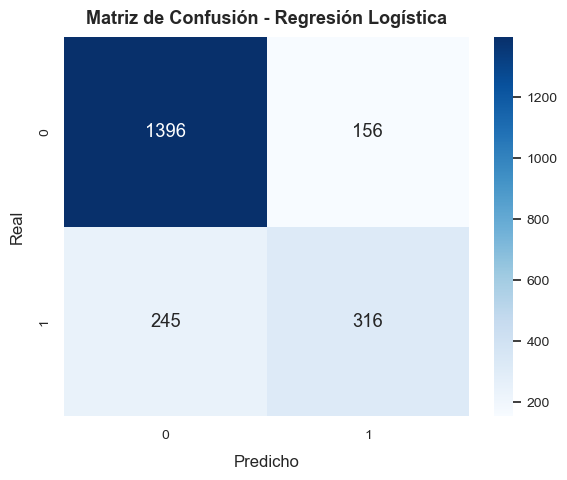

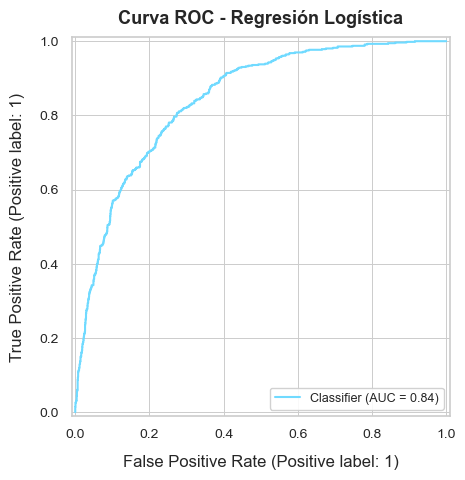

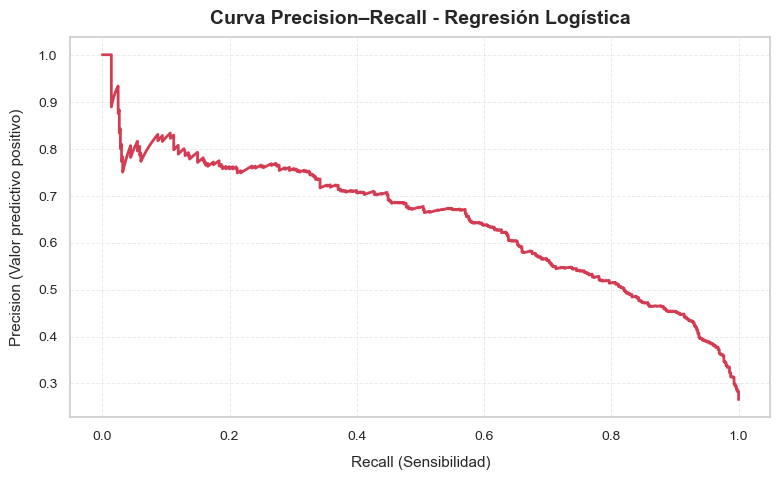

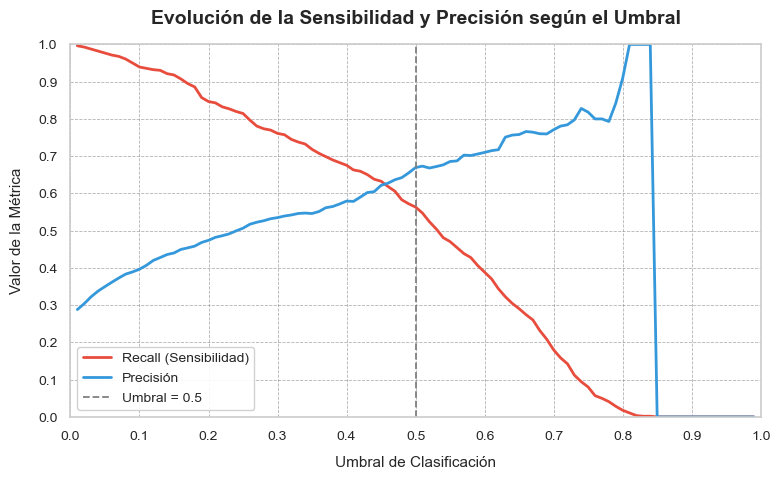

In [ ]:
# --- 7️⃣ Visualización de resultados

# Matriz de confusión visual
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística", fontsize=13, weight="bold", pad=10)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# Curva ROC
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("Curva ROC - Regresión Logística", fontsize=13, weight="bold", pad=10)
plt.tight_layout()
plt.show()

# Curva Precision–Recall
y_proba = logit_pipeline.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, color="#D43D51", linewidth=2)
plt.title("Curva Precision–Recall - Regresión Logística", fontsize=14, weight="bold", pad=10)
plt.xlabel("Recall (Sensibilidad)", fontsize=11)
plt.ylabel("Precision (Valor predictivo positivo)", fontsize=11)
plt.grid(alpha=0.4, linestyle="--")
plt.tight_layout()
plt.show()

# Sensibilidad y Precisión según el Umbral

recalls = []
precisions = []
thresholds_range = np.linspace(0.01, 0.99, 99)

for t in thresholds_range:
    y_pred_temp = (y_proba >= t).astype(int)
    recalls.append(recall_score(y_test, y_pred_temp))
    precisions.append(precision_score(y_test, y_pred_temp, zero_division=0))

plt.figure(figsize=(8, 5))
plt.plot(thresholds_range, recalls, label="Recall (Sensibilidad)", color="#E74C3C", linewidth=2)
plt.plot(thresholds_range, precisions, label="Precisión", color="#3498DB", linewidth=2)
plt.axvline(0.5, color="gray", linestyle="--", linewidth=1.3, label="Umbral = 0.5")

plt.title("Evolución de la Sensibilidad y Precisión según el Umbral", fontsize=14, weight="bold", pad=15)
plt.xlabel("Umbral de Clasificación", fontsize=11)
plt.ylabel("Valor de la Métrica", fontsize=11)
plt.legend(fontsize=10)
plt.grid(which="major", color="gray", linestyle="--", linewidth=0.6, alpha=0.6)
plt.grid(which="minor", color="lightgray", linestyle=":", linewidth=0.4, alpha=0.6)

plt.xticks(np.arange(0, 1.01, 0.1))   # cada 0.1
plt.yticks(np.arange(0, 1.01, 0.1))   # cada 0.1
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

### Interpretación

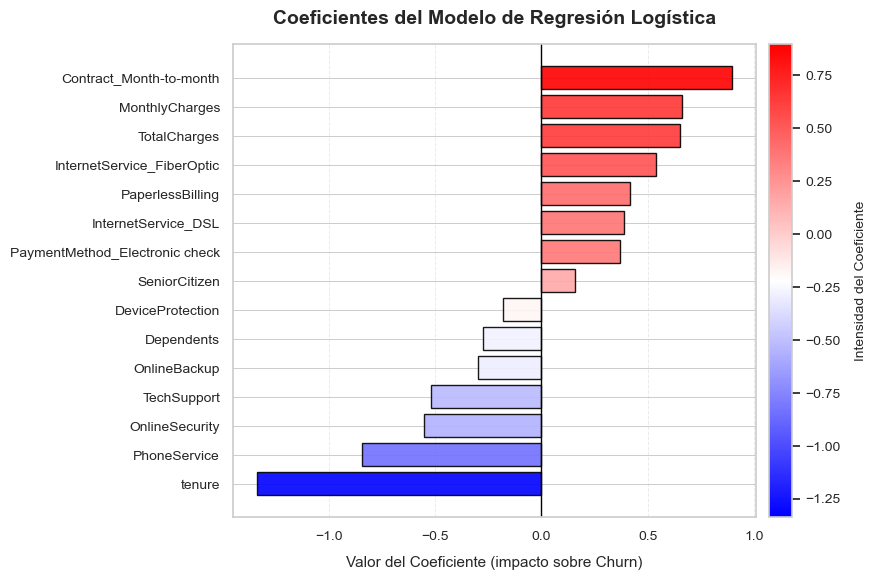

In [42]:
# --- Crear DataFrame de coeficientes
coef = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": logit_pipeline.named_steps["model"].coef_[0]
})

# --- Ordenar de menor a mayor
coef = coef.sort_values(by="Coeficiente", ascending=True)

# --- Crear mapa de colores (azul → blanco → rojo)
norm = plt.Normalize(coef["Coeficiente"].min(), coef["Coeficiente"].max())
colors = plt.cm.bwr(norm(coef["Coeficiente"]))  # Blue-White-Red

# --- Crear figura y ejes
fig, ax = plt.subplots(figsize=(9, 6))

# --- Gráfico de barras horizontales
bars = ax.barh(
    coef["Variable"],
    coef["Coeficiente"],
    color=colors,
    edgecolor="black",
    alpha=0.9
)

# --- Personalización
ax.set_title("Coeficientes del Modelo de Regresión Logística",
             fontsize=14, weight="bold", pad=15)
ax.set_xlabel("Valor del Coeficiente (impacto sobre Churn)", fontsize=11)
ax.set_ylabel("")
ax.axvline(0, color="black", linewidth=1)
ax.grid(axis="x", linestyle="--", alpha=0.4)
ax.tick_params(labelsize=10)
plt.tight_layout()

# --- Barra de color (vinculada explícitamente al eje 'ax')
sm = plt.cm.ScalarMappable(cmap="bwr", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", pad=0.02)
cbar.set_label("Intensidad del Coeficiente", fontsize=10)
plt.show()

### Prueba: disminución del umbral de clasificación

🔹 Umbral aplicado: 0.35

🔹 Reporte de Clasificación (umbral ajustado):

              precision    recall  f1-score   support

    No Churn       0.89      0.78      0.83      1552
       Churn       0.55      0.72      0.62       561

    accuracy                           0.77      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.80      0.77      0.78      2113



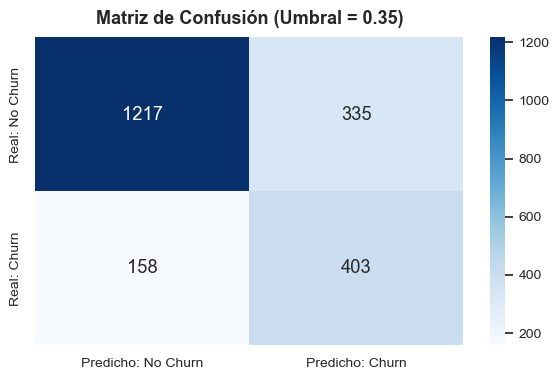


🔹 ROC AUC Score: 0.844


In [43]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1️⃣ Entrenamiento (ya hecho arriba)
logit_pipeline.fit(X_train, y_train)

# --- 2️⃣ Predicciones de probabilidad
y_proba = logit_pipeline.predict_proba(X_test)[:, 1]

# --- 3️⃣ Ajuste del umbral (por ejemplo 0.35 en lugar de 0.5)
threshold = 0.35
y_pred_adjusted = np.where(y_proba >= threshold, 1, 0)

# --- 4️⃣ Evaluación
print(f"🔹 Umbral aplicado: {threshold}")
print("\n🔹 Reporte de Clasificación (umbral ajustado):\n")
print(classification_report(y_test, y_pred_adjusted, target_names=["No Churn", "Churn"]))

# --- 5️⃣ Matriz de Confusión
cm_adj = confusion_matrix(y_test, y_pred_adjusted)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_adj,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicho: No Churn", "Predicho: Churn"],
    yticklabels=["Real: No Churn", "Real: Churn"]
)
plt.title(f"Matriz de Confusión (Umbral = {threshold})", fontsize=13, weight="bold", pad=10)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

# --- 6️⃣ AUC (no depende del umbral)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\n🔹 ROC AUC Score: {roc_auc:.3f}")
